In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os, sys

Mounted at /content/drive


## **Load the dataset: NF-CSE-CIC-IDS2018-v2**

For NF-UNSW-NB15-v2, the full dataset (2.39 million rows) was processed for EDA. For NF-CSE-CIC-IDS2018-v2 (18.89 million rows), representative EDA was performed using a 30k-50k row random sample for computational efficiency and compatibility with industry-standard practices.

In [ ]:
count = 0
with open('/content/drive/MyDrive/FlowTransformer/data/NF-CSE-CIC-IDS2018-v2/NF-CSE-CIC-IDS2018-v2.csv') as f:
    for _ in f:
        count += 1
print(f'Total rows: {count}')

Total rows: 18893709


In [ ]:
import pandas as pd
file_path = "/content/drive/MyDrive/FlowTransformer/data/NF-CSE-CIC-IDS2018-v2/NF-CSE-CIC-IDS2018-v2.csv"
df = pd.read_csv(file_path, nrows=50000)

**1. Basic Data Preview**

In [ ]:
print(df.shape)
print(df.columns)
print(df.head())

(50000, 45)
Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS',
       'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 'MIN_TTL',
       'MAX_TTL', 'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN',
       'MAX_IP_PKT_LEN', 'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES',
       'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS',
       'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
       'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
       'ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE',
       'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE', 'Label', 'Attack'],
      dtype='o

**2. Missing Values Checking**

In [ ]:
print(df.isnull().sum().sort_values(ascending=False))

IPV4_SRC_ADDR                  0
L4_SRC_PORT                    0
IPV4_DST_ADDR                  0
L4_DST_PORT                    0
PROTOCOL                       0
L7_PROTO                       0
IN_BYTES                       0
IN_PKTS                        0
OUT_BYTES                      0
OUT_PKTS                       0
TCP_FLAGS                      0
CLIENT_TCP_FLAGS               0
SERVER_TCP_FLAGS               0
FLOW_DURATION_MILLISECONDS     0
DURATION_IN                    0
DURATION_OUT                   0
MIN_TTL                        0
MAX_TTL                        0
LONGEST_FLOW_PKT               0
SHORTEST_FLOW_PKT              0
MIN_IP_PKT_LEN                 0
MAX_IP_PKT_LEN                 0
SRC_TO_DST_SECOND_BYTES        0
DST_TO_SRC_SECOND_BYTES        0
RETRANSMITTED_IN_BYTES         0
RETRANSMITTED_IN_PKTS          0
RETRANSMITTED_OUT_BYTES        0
RETRANSMITTED_OUT_PKTS         0
SRC_TO_DST_AVG_THROUGHPUT      0
DST_TO_SRC_AVG_THROUGHPUT      0
NUM_PKTS_U

**3. Duplicate Rows Checking**

In [ ]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

0


**4. Outlier and Anomaly Detection**

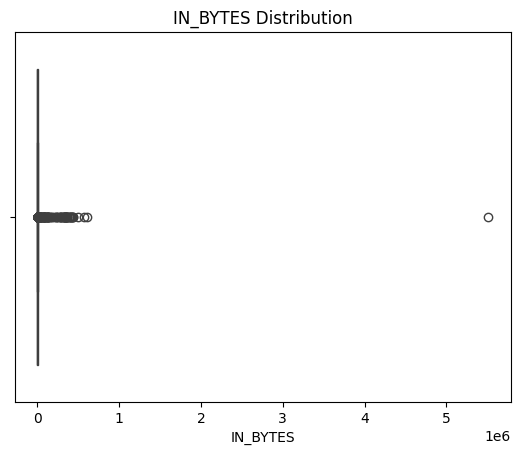

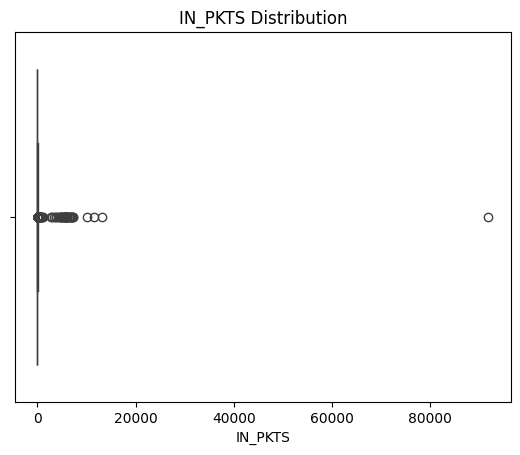

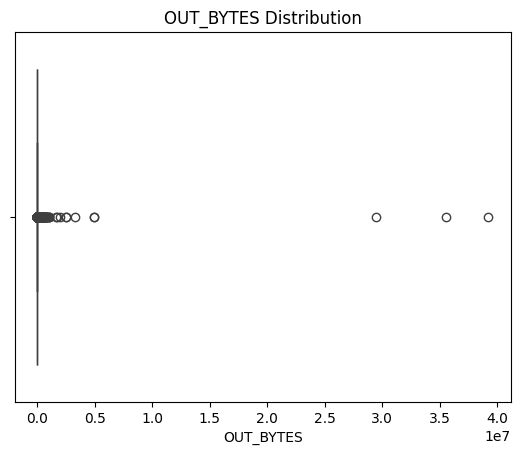

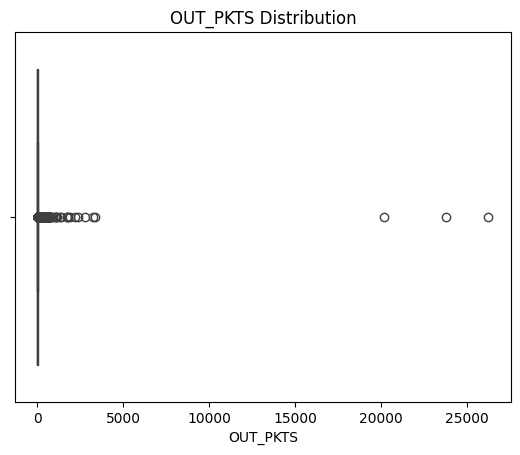

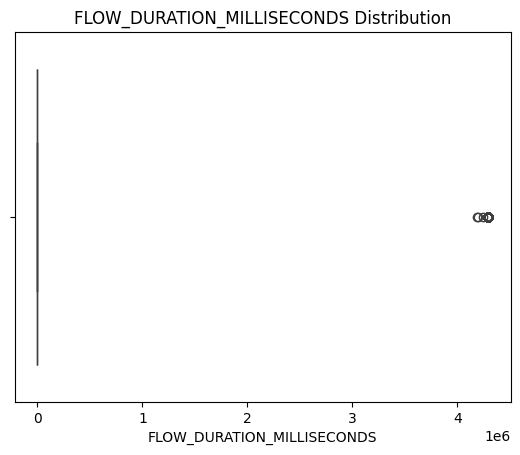

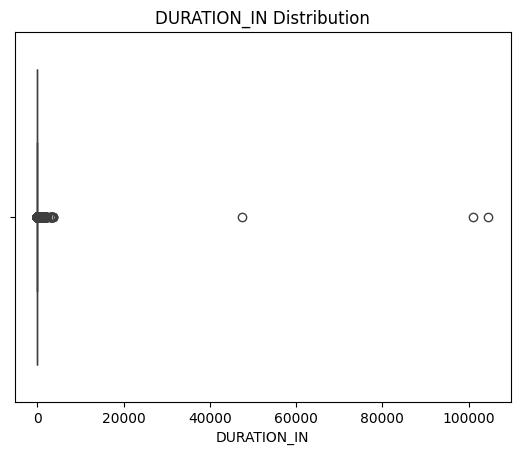

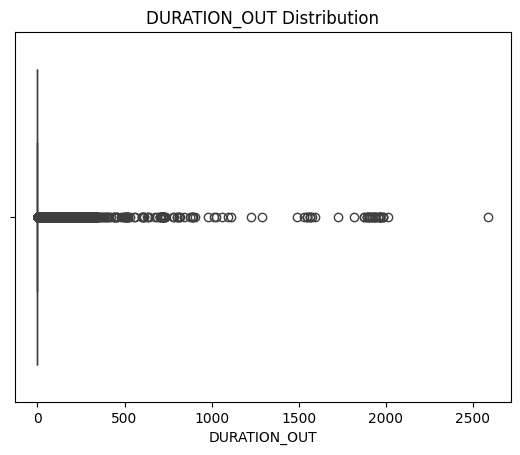

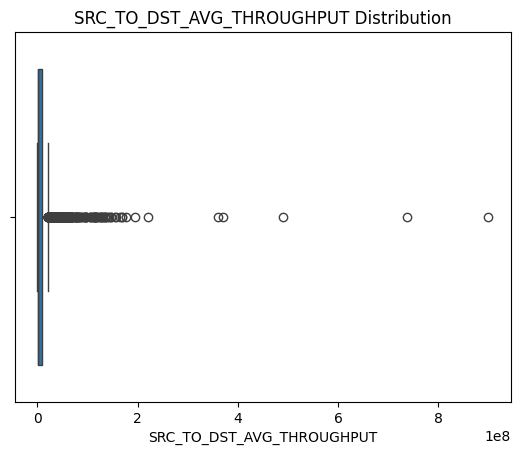

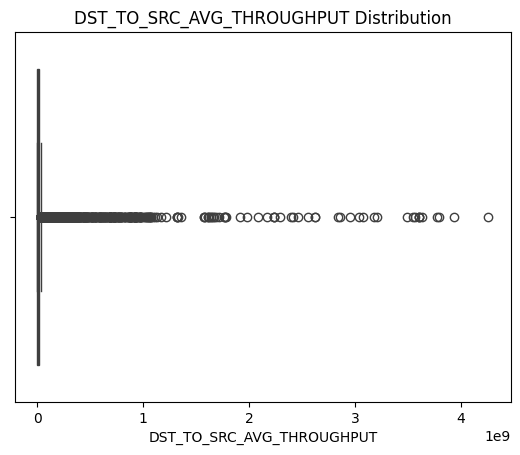

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
num_cols = [
    'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS',
    'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT',
    'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT'
]
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f'{col} Distribution')
    plt.show()

**5. Data Preprocessing (Deduplication, Imputation, Outlier Removal)**

In [ ]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]

**6. Class Distribution Overview**

Label
0    31152
1      810
Name: count, dtype: int64


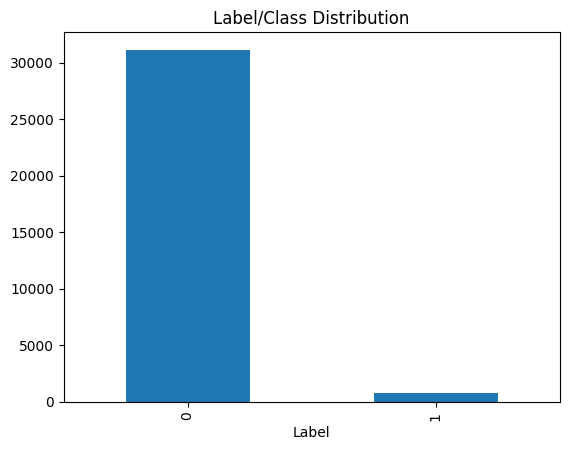

In [ ]:
print(df['Label'].value_counts())
df['Label'].value_counts().plot(kind='bar')
plt.title('Label/Class Distribution')
plt.show()

**7. Sample Records with Class Labels**

In [ ]:
print(df[['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
          'PROTOCOL', 'IN_BYTES', 'OUT_BYTES', 'Label', 'Attack']].head())

   IPV4_SRC_ADDR  L4_SRC_PORT IPV4_DST_ADDR  L4_DST_PORT  PROTOCOL  IN_BYTES  \
2    172.31.66.5        65456    172.31.0.2           53        17       116   
3   172.31.64.92        57918    172.31.0.2           53        17        70   
6   172.31.68.18        49190    172.31.0.2           53        17        68   
7  172.31.65.118        51812    172.31.0.2           53        17       105   
9   172.31.65.93        57771    172.31.0.2           53        17        72   

   OUT_BYTES  Label  Attack  
2        148      0  Benign  
3        130      0  Benign  
6        106      0  Benign  
7        233      0  Benign  
9        100      0  Benign  


**8. Attack Type Distribution by Feature**

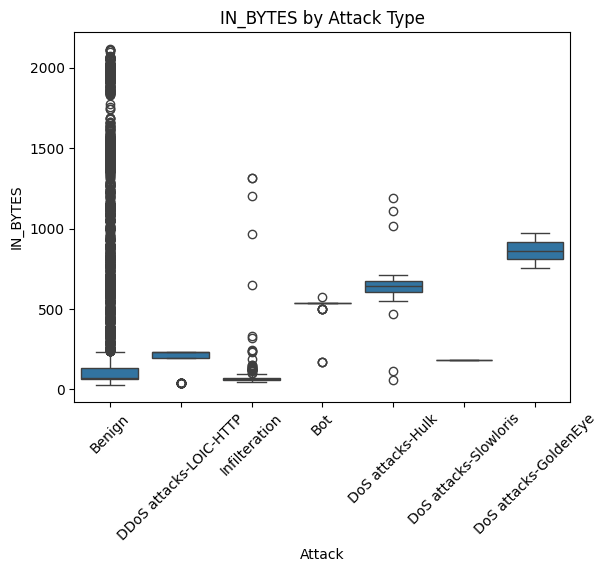

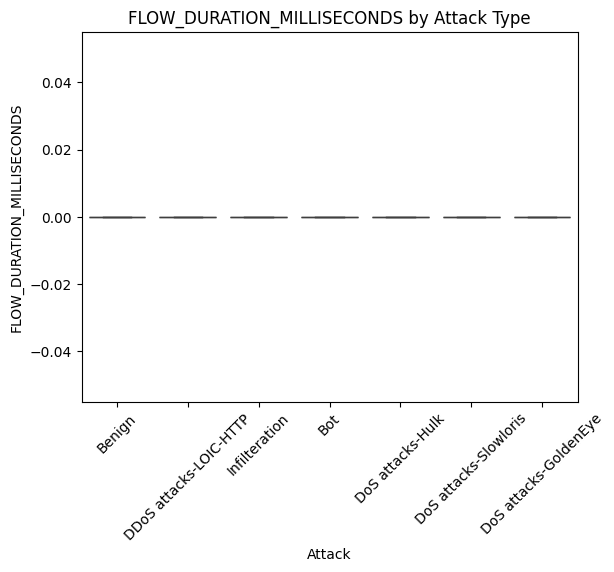

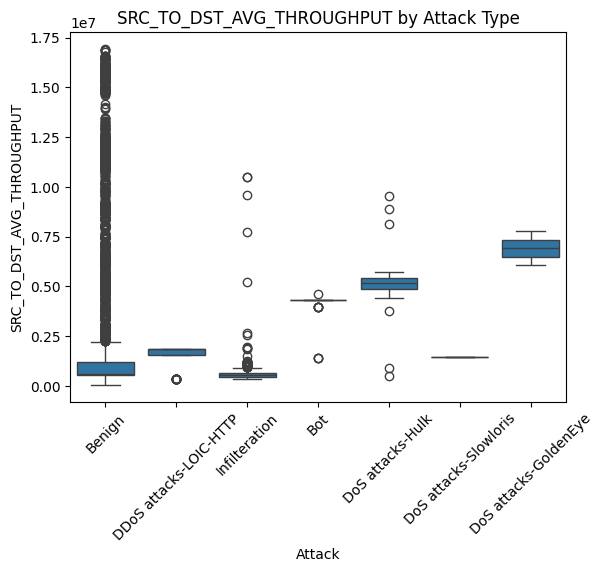

In [ ]:
for col in ['IN_BYTES', 'FLOW_DURATION_MILLISECONDS', 'SRC_TO_DST_AVG_THROUGHPUT']:
    plt.figure()
    sns.boxplot(x='Attack', y=col, data=df)
    plt.title(f'{col} by Attack Type')
    plt.xticks(rotation=45)
    plt.show()

**9. Protocol and Port Analysis per Category**

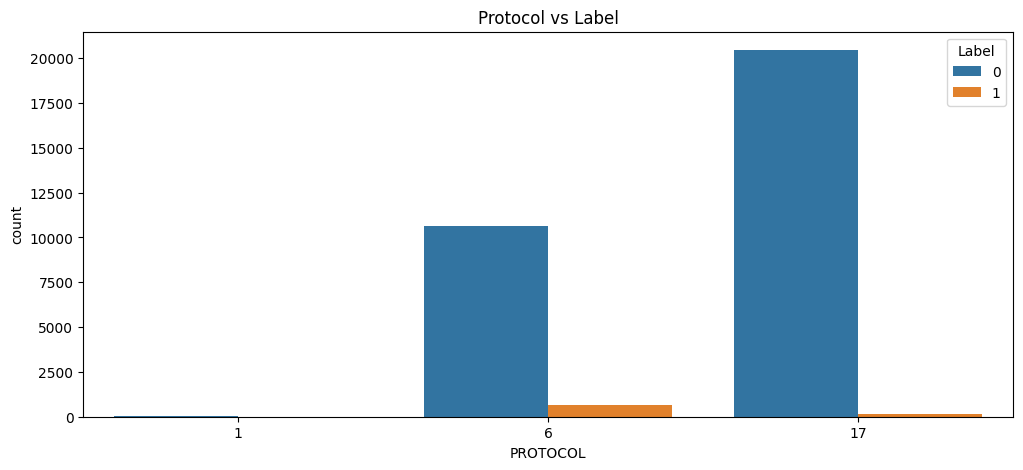

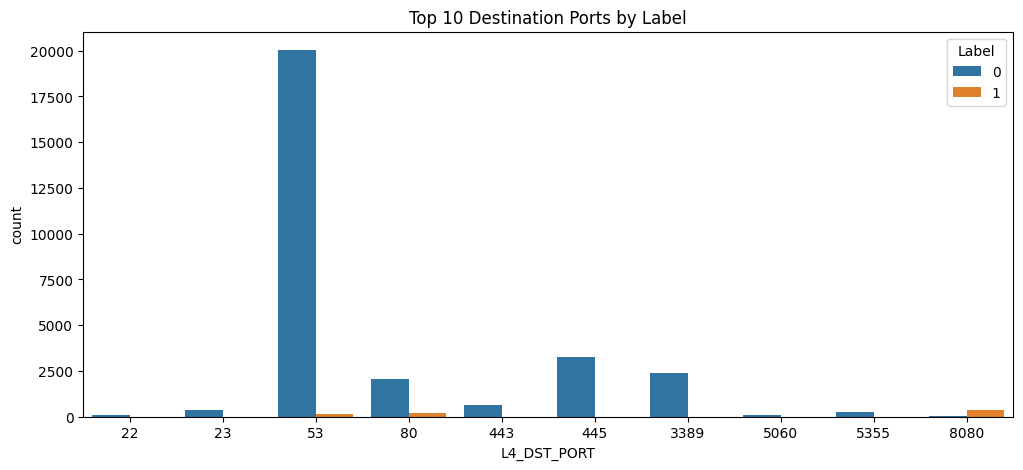

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='PROTOCOL', hue='Label', data=df)
plt.title('Protocol vs Label')
plt.show()

plt.figure(figsize=(12,5))
top_ports = df['L4_DST_PORT'].value_counts().index[:10]
sns.countplot(x='L4_DST_PORT', hue='Label', data=df[df['L4_DST_PORT'].isin(top_ports)])
plt.title('Top 10 Destination Ports by Label')
plt.show()

**10. Feature Correlation Analysis**

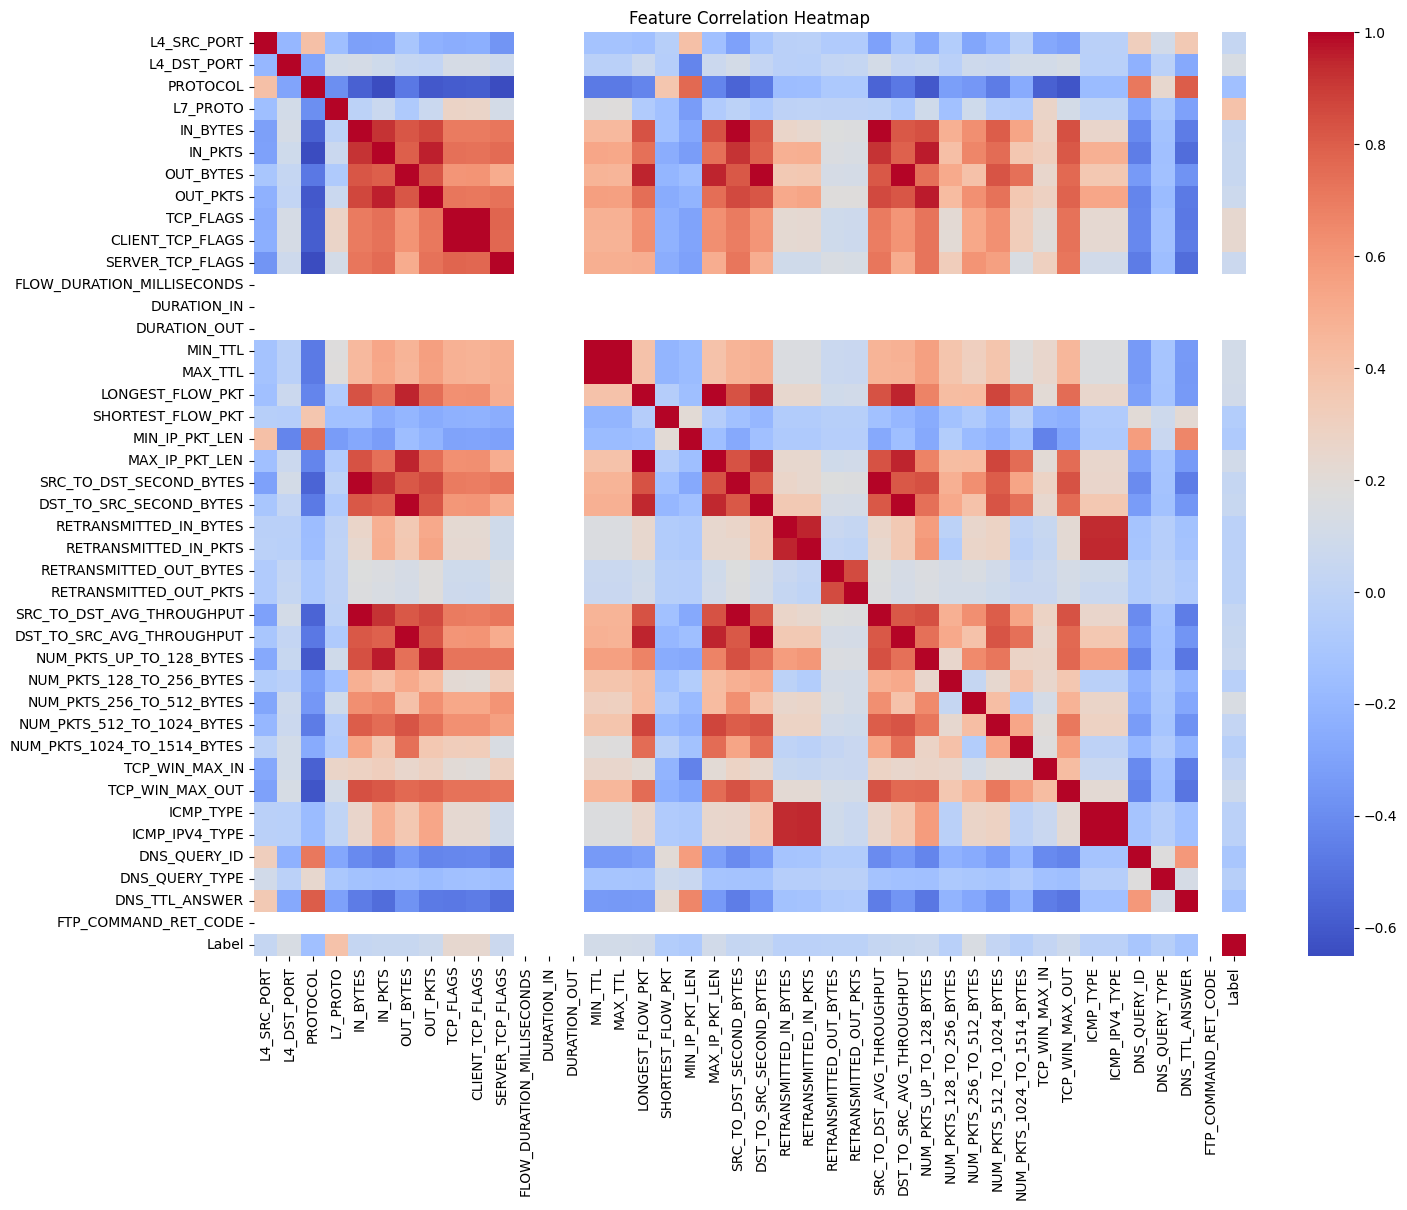

In [ ]:
corrmat = df.select_dtypes(include='number').corr()
plt.figure(figsize=(16,12))
sns.heatmap(corrmat, annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()